In [1]:
import pandas as pd

Read in gemini data

In [2]:
with open("./gemini_pull_2019_01_16_18_07_06.txt", "r") as file:
    gemini = file.read()

In [3]:
type(gemini)

str

In [5]:
%%time
gemini_list = gemini.replace("}{", "}\n{").split("\n")

CPU times: user 13.9 ms, sys: 0 ns, total: 13.9 ms
Wall time: 15.8 ms


In [7]:
len(gemini_list)

10844

In [8]:
[len(i) for i in gemini_list[:10]]

[386154, 219, 222, 220, 226, 224, 222, 220, 222, 219]

In [11]:
first_message_df = pd.read_json(gemini_list[0])

In [12]:
first_message_df.head()

,eventId,events,socket_sequence,type
0,5368619062,"{'remaining': '191642.102', 'side': 'bid', 'de...",0,update
1,5368619062,"{'remaining': '22959.5', 'side': 'bid', 'delta...",0,update
2,5368619062,"{'remaining': '33', 'side': 'bid', 'delta': '3...",0,update
3,5368619062,"{'remaining': '0.00055', 'side': 'bid', 'delta...",0,update
4,5368619062,"{'remaining': '3693', 'side': 'bid', 'delta': ...",0,update


In [13]:
first_message_df.dtypes

eventId             int64
events             object
socket_sequence     int64
type               object
dtype: object

In [19]:
first_message_df["events"].iloc[0]

{'delta': '191642.102',
 'price': '0.01',
 'reason': 'initial',
 'remaining': '191642.102',
 'side': 'bid',
 'type': 'change'}

In [22]:
event_keys = first_message_df["events"].iloc[0].keys()

In [25]:
for i in event_keys:
    first_message_df[i] = first_message_df["events"].map(lambda x: x[i])

In [26]:
first_message_df.head()

,eventId,events,socket_sequence,type,remaining,side,delta,price,reason
0,5368619062,"{'remaining': '191642.102', 'side': 'bid', 'de...",0,change,191642.102,bid,191642.102,0.01,initial
1,5368619062,"{'remaining': '22959.5', 'side': 'bid', 'delta...",0,change,22959.5,bid,22959.5,0.02,initial
2,5368619062,"{'remaining': '33', 'side': 'bid', 'delta': '3...",0,change,33,bid,33,0.03,initial
3,5368619062,"{'remaining': '0.00055', 'side': 'bid', 'delta...",0,change,0.00055,bid,0.00055,0.04,initial
4,5368619062,"{'remaining': '3693', 'side': 'bid', 'delta': ...",0,change,3693,bid,3693,0.05,initial


each price shows up once:

In [30]:
first_message_df.price.value_counts().head()

717.00      1
19000.74    1
2915.00     1
14700.00    1
2660.10     1
Name: price, dtype: int64

delta always equals remaining:

In [32]:
len(first_message_df[first_message_df.remaining != first_message_df.delta])

0

In [34]:
initial_interest = first_message_df[["side", "price", "remaining"]].drop_duplicates()

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
initial_interest.dtypes

side         object
price        object
remaining    object
dtype: object

In [60]:
first_message_df["price"] = first_message_df.price.astype("float")
first_message_df["remaining"] = first_message_df.remaining.astype("float")

In [73]:
bids = first_message_df[first_message_df.side == "bid"].sort_values("price", ascending = False)
bids["cum_interest"] = bids.remaining.cumsum()

In [80]:
asks = first_message_df[first_message_df.side == "ask"].sort_values("price", ascending = True)
asks["cum_interest"] = asks.remaining.cumsum()

In [81]:
close_to_top = [s[s.price.between(3600, 3640)] for s in [bids, asks]]

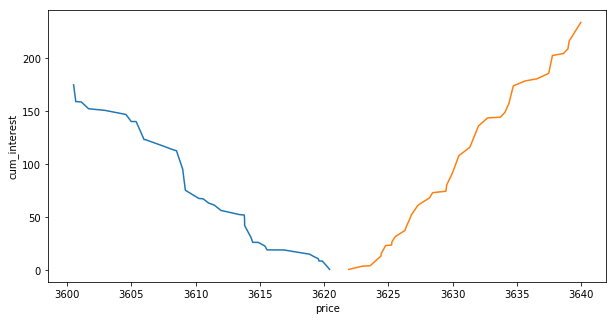

In [82]:
fig, ax = plt.subplots(figsize = (10, 5))

[sns.lineplot(ax = ax, data = s, x = "price", y = "cum_interest") for s in close_to_top]

In [53]:
first_message_df[first_message_df.side == "bid"].price.astype("float").max()

3620.4200000000001

In [52]:
first_message_df[first_message_df.side == "ask"].price.astype("float").min()

3621.9200000000001